# Pytorch Workflow 

In [1]:
what_were_convering = {1 : 'data (prepare and load)',
                       2 : 'data (explore and clean)',
                       3 : 'Fitting the model',
                       4 : 'Making predictions and evaluating the model',
                       5 : 'Saving and load model',
                       6 : 'Puting it all together'
                       }
what_were_convering

{1: 'data (prepare and load)',
 2: 'data (explore and clean)',
 3: 'Fitting the model',
 4: 'Making predictions and evaluating the model',
 5: 'Saving and load model',
 6: 'Puting it all together'}

In [2]:
import torch
from torch import nn # nn contain all of PyTorch's builind blocks for neural networks https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt

# Check PyTorch Version
print(torch.__version__)

2.0.0


### 1. Data (Preparing and Loading)

Data can be almost anything . . . in machine learning

* Excel spreadsheets
* Images of any kind
* Videos 
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Gets data into a numerical format
2. Build a model to learn pattern in that numerical representation

To show case this, let's create some *know* data using linear regression formula.

In [3]:
# Create *know* parameters
weights = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weights * X + bias

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [4]:
print(X.shape, y.shape)

torch.Size([50, 1]) torch.Size([50, 1])


### Splitting data into training and test set (one of most important concepts in machine learning general) 

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

40 40
10 10


How might we better visualize our data ? <br>
This is where the data explorer's motto comes in ! <br>
"Visualize, visualize, visualize!"

In [6]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    """Plots training data, test data and compares predictions."""

    plt.figure(figsize = (10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing data")

    # Are there prediction ?
    if predictions is not None:
        # Plot the prediction in they exist
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Predictions")

    # Show the legend
    plt.legend(prop = {"size" : 14})


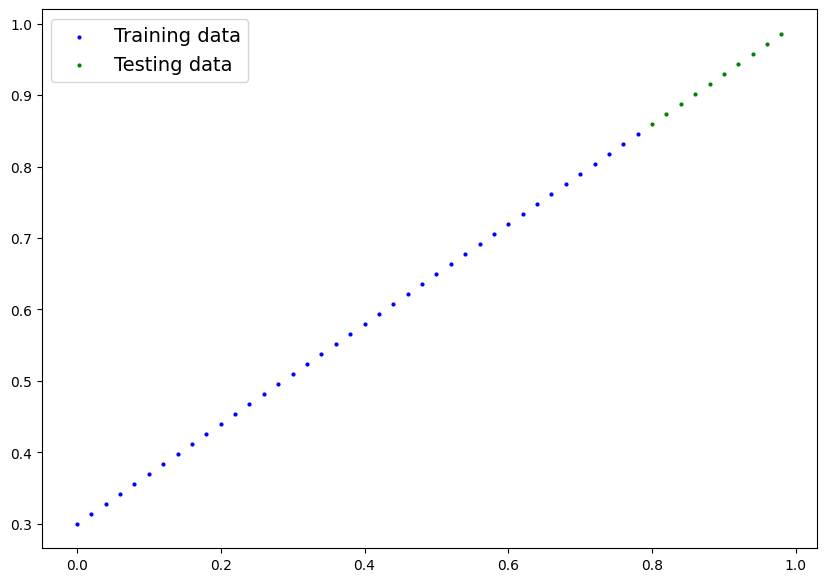

In [7]:
plot_prediction()

## 2. Build model

Our first PyTorch model !

What our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent ( or get closer to ) the ideal values (the weights & bias values we used to create the data)

How does it do so ?
Through two main algorithm:
1. Gradient descent
2. Backpropagation

In [8]:
# Create Linear Regression Model
class LinearRegressionModel(nn.Module): # -< All everythings in PyTorch are inherited from nn.Module
    def __init__(self):
        super().__init__()
        # Initial model parameters
        self.weights = nn.Parameter(torch.randn(1, # start with random weights
                                                requires_grad = True, # update via gradient descent
                                                dtype = torch.float)) # data type is float
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad = True, 
                                             dtype = torch.float))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is linear regression formula

### PyTorch model building essentials
* torch.nn - contain all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent. The optimizer we'll use is called Adam (a common and effective optimizer)
* def forward() - All nn.Module subclasses required you to overwrite forward(), this method defined what happens in the forward computation, i.e. how the model passes inputs to outputs.

Torch CheatSheet -> https://pytorch.org/tutorials/beginner/ptcheat.html

Check our model parameters or what's inside our model using .parameters() method

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is subclss of nn.Module)
model_0 = LinearRegressionModel()

# Chech out the parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward() method.

In [11]:
# Make predictions with model
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

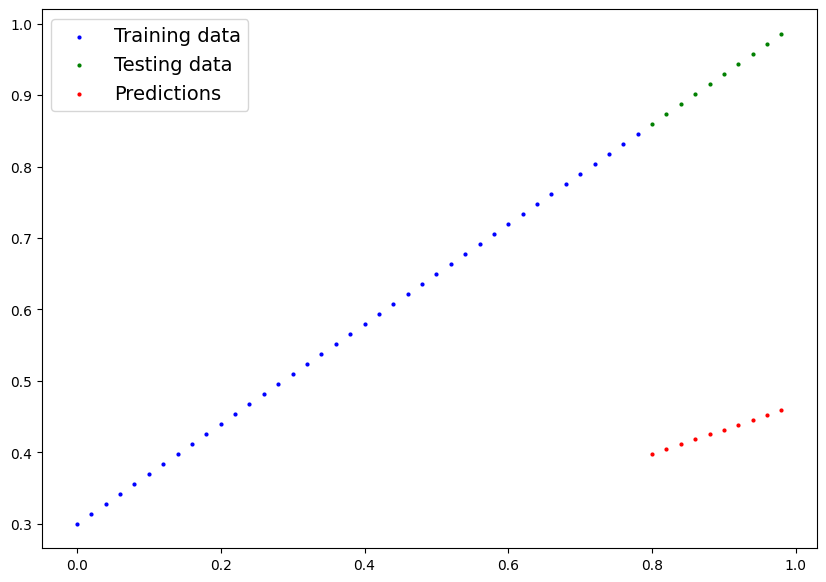

In [13]:
plot_prediction(predictions = y_pred)

### 3. Train model

The whole idea of training is for a model to move from some *unknow* parameters (these may be random) to some *know* parameters

Or in other words from a poor representation of the data to a better representation of data.

One way measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our cases, we're going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better. <br>
More information: https://pytorch.org/docs/stable/nn.html#loss-functions

* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weights, bias) <br>
More information : https://pytorch.org/docs/stable/optim.html

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Note:
* Loss function used for measure how wrong of predict data and actual data
* Optimize fuction used for adjust our model parameter 

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup a optimize function
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involve data moving through our model's forward() functions) to make prediction on data - also called forward propagation
2. Calculate the loss (Compare forward pass prediction to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient Descent**)


In [17]:
# Before training
print(f'Before training: {model_0.state_dict()}')

Before training: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [18]:
# Setup empty lists for keep track of model progress
epoch_count = []
train_lost_values = []
test_loss_values = []

# manual seed
torch.manual_seed(42)

epochs = 200 # this is hyperparameter because we've set it ourselves

### Training 
# 0. Loop through data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameter that required gradients to require gradient

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perfrom gradient descent)
    optimizer.step() # By default how the optimizer changes will acculumate through the loop so ... we have zero them above in step 3 for the next iteration of the

    ### Testing
    model_0.eval() # Turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turn off gradient tracking & a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Append epochs, train loss and test loss into list
    epoch_count.append(epoch)
    train_lost_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epochs {epoch} | Loss : {loss} | Test loss: {test_loss}')

# Print model state dict
print(f'Model: {model_0.state_dict()}')


Epochs 0 | Loss : 0.31288138031959534 | Test loss: 0.48106518387794495
Epochs 1 | Loss : 0.3013603389263153 | Test loss: 0.4675942063331604
Epochs 2 | Loss : 0.28983935713768005 | Test loss: 0.4541231691837311
Epochs 3 | Loss : 0.2783183455467224 | Test loss: 0.44065219163894653
Epochs 4 | Loss : 0.26679736375808716 | Test loss: 0.4271811842918396
Epochs 5 | Loss : 0.2552763521671295 | Test loss: 0.41371020674705505
Epochs 6 | Loss : 0.24375534057617188 | Test loss: 0.40023916959762573
Epochs 7 | Loss : 0.23223432898521423 | Test loss: 0.3867681920528412
Epochs 8 | Loss : 0.22071333229541779 | Test loss: 0.37329721450805664
Epochs 9 | Loss : 0.20919232070446014 | Test loss: 0.3598262071609497
Epochs 10 | Loss : 0.1976713240146637 | Test loss: 0.3463551998138428
Epochs 11 | Loss : 0.18615034222602844 | Test loss: 0.3328842222690582
Epochs 12 | Loss : 0.1746293306350708 | Test loss: 0.3194132149219513
Epochs 13 | Loss : 0.16310831904411316 | Test loss: 0.30594223737716675
Epochs 14 | Los

In [19]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

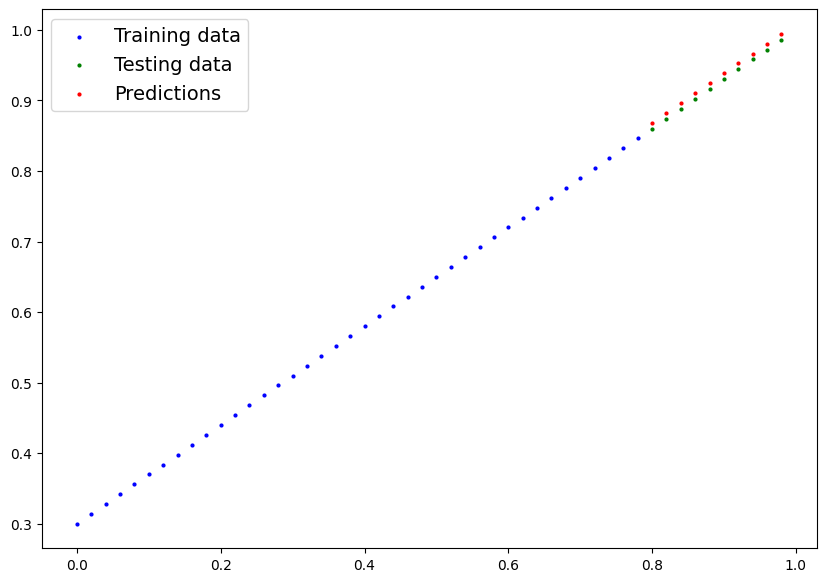

In [20]:
plot_prediction(predictions = y_pred_new)

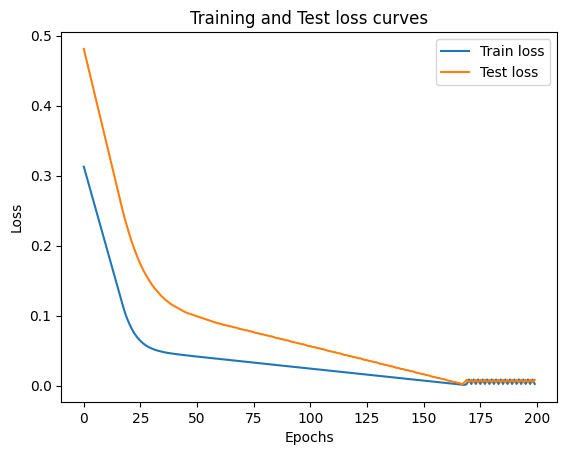

In [21]:
import numpy as np 
# Plot the loss curve
plt.plot(epoch_count, torch.tensor(train_lost_values).cpu().numpy(), label = 'Train loss')
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label = 'Test loss')
plt.title('Training and Test loss curves')
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Saving a model in PyTorch

Threre are three main methods you should about for saving and loading models in PyTorch.

1. torch.save() - allows you save a PyTorch objects in Python's pickle format
2. torch.load() - allows you load a saved PyTorch objects
3. torch.nn.Module.load_state_dict() - This allow to load a model's saved state dictionary

More information: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [22]:
# Saving our PyTorch Model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)


# 2. Create model save path
MODEL_NAME = '01_PyTorch_workflow_model_0.pth' # can use .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


In [23]:
# 3. Save the model state dict
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)
print(f'Saving model to: {MODEL_SAVE_PATH}')

Saving model to: models\01_PyTorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved *state_dict()* into that

In [24]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
print(f'Original model: {loaded_model_0.state_dict()}')

# Load the save state_dict of model_0 ( this will update the new instance with update parameter)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
print(f'Update parameters model: {loaded_model_0.state_dict()}')


Original model: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Update parameters model: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [25]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_predict = loaded_model_0(X_test)

loaded_model_predict

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
# Make some predict with original model
model_0.eval()
with torch.inference_mode():
    original_model_predict = model_0(X_test)
original_model_predict

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
# Compare loaded model preds with original model preds
loaded_model_predict == original_model_predict

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [31]:
# You can load model without based of structure class
load_model_1 = torch.load(f = MODEL_SAVE_PATH)
print(load_model_1)

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


### Putting it all together

Let's go back through the steps above and see it all in one place

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.0'

Create device-agonstic code. <br>
This mean if we've got a GPU, we want our code to run on it, if not, we want it to run on a CPU.

In [3]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
count_device = torch.cuda.device_count()
print(f'You have {count_device} GPU(s) available')

You have 1 GPU(s) available


In [4]:
!nvidia-smi

Fri Jun  9 23:13:56 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.26                 Driver Version: 531.26       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti    WDDM | 00000000:01:00.0  On |                  N/A |
| 68%   37C    P8               24W / 140W|   1250MiB /  8192MiB |     46%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
# Create some data using the linear regression formula ( y = weights * X + bias )
weights = 0.7
bias = 0.3

# Create range value
start = 0
end = 1
step = 0.02

# Create X and y ( features and labels )
X = torch.arange(start = start, end = end, step = step).unsqueeze(dim = 1) # unsqueeze to keep the shape of X is (n, 1)
y = weights * X + bias
print(f'X: {X[:10]}\n y: {y[:10]}')

X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
 y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [6]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: torch.Size([40, 1]), y_train: torch.Size([40, 1])
X_test: torch.Size([10, 1]), y_test: torch.Size([10, 1])


In [7]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    """Plots training data, test data and compares predictions."""

    plt.figure(figsize = (10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing data")

    # Are there prediction ?
    if predictions is not None:
        # Plot the prediction in they exist
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Predictions")

    # Show the legend
    plt.legend(prop = {"size" : 14})


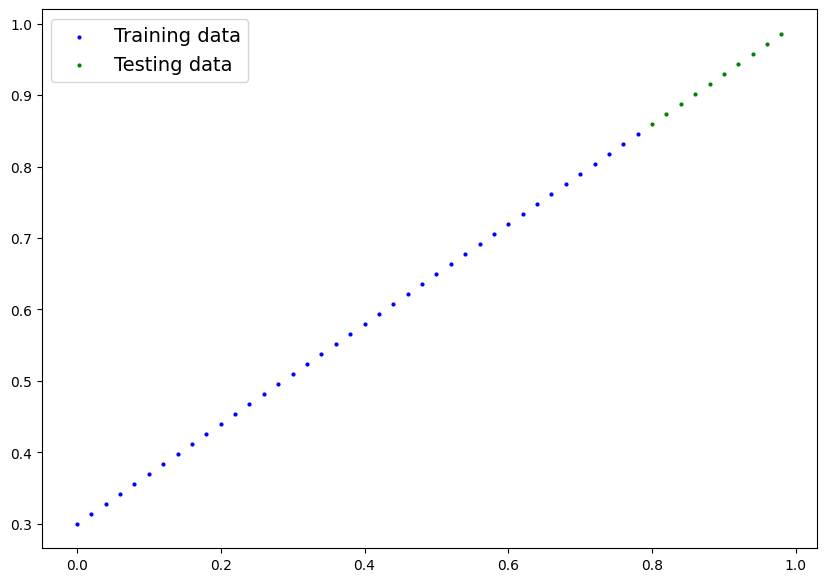

In [8]:
# plot data
plot_prediction(X_train, y_train, X_test, y_test)

### Building PyTorch Linear model

In [9]:
from torch import nn
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameter / also called: linear transform, probing layer, fully connected layer
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

NameError: name 'nn' is not defined